In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 80

import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.stats.api as sms

### 評分標準

#### 13.33~13.37 (25%)  
    population number notation（ex:令 $\mu_1$ 為new的均數;  $\mu_2$ 為existing的均數) 1%  
    t-test：H0H1 2%, t statistics or p value 9%(視過程酌量給分), reject H0 or not 2%, conclusion 2%  
    F-test：H0H1 1%, f statistics or p value 6%(視過程酌量給分), reject H0 or not 1%, conclusion 1%  
    
#### 13.115~13.117 (25%)  
    population number notation（ex:令 $\sigma_1$ 為Week1的變異數;  $\sigma_2$ 為Week2的變異數） 1%      
    F-test：H0H1 3%, f statistics or p value 14%(視過程酌量給分), reject H0 or not 3%, conclusion 3%  

### 13.33 (25%)

令 $\mu_1$ 為new的均數;  $\mu_2$ 為existing的均數

Null Hypothesis: $\mu_1 - \mu_2 <= 0$  
Alternative Hypothesis: $\mu_1 - \mu_2 > 0$

Alpha = 0.05

In [2]:
data33 = pd.read_excel("Xr13-33.xlsx")

# 轉換成numpy array
sample1 = data33['New'].values
sample2 = data33['Existing'].values

# 移除nan
sample1 = sample1[~np.isnan(sample1)]
sample2 = sample2[~np.isnan(sample2)]

#自由度計算
v1 = sample1.shape[0] - 1
v2 = sample2.shape[0] - 1

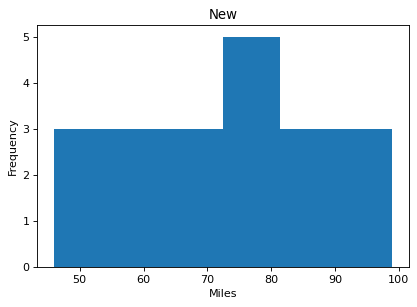

In [3]:
fig = plt.hist(sample1, bins = 'auto')
plt.title('New')
plt.ylabel('Frequency')
plt.xlabel('Miles')
plt.show()

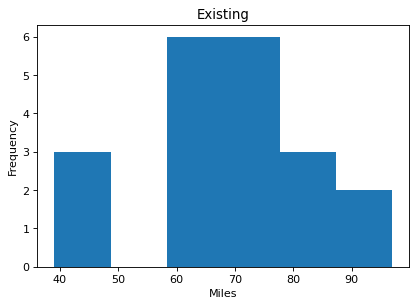

In [4]:
fig = plt.hist(sample2, bins = 'auto')
plt.title('Existing')
plt.ylabel('Frequency')
plt.xlabel('Miles')
plt.show()

Based on the histograms, both samples appear to be normally distributed. 

t檢定前，先檢驗變異數是否相同  
令 $\sigma_1^2$ 為new的變異數;  $\sigma_2^2$ 為existing的變異數

Null Hypothesis: $\sigma_1^2 / \sigma_2^2 = 1$ <br>
Alternative Hypothesis: $\sigma_1^2 / \sigma_2^2 \ne 1$  

雙尾檢定，alpha = 0.05

In [5]:
var_ratio = stats.describe(sample1).variance / stats.describe(sample2).variance
print(f"var_ratio (F value) = {var_ratio:.4f}")

#stats.f.cdf計算 f 從 0~var_ratio 的機率，此題為雙尾檢定且Ｆvalue>1(右)，須調整為(1-pvalue)*2
ptmp = stats.f.cdf(var_ratio, v1, v2)
p_value = (1-ptmp)*2
print(f"p_value = {p_value:.4f}")

var_ratio (F value) = 1.0732
p_value = 0.8792


The p-value is larger than the required 0.05 significance level, there is no sufficient evidence to reject the null hypothesis of $\sigma_1^2 / \sigma_2^2 = 1$ <br>
As a result, we assume that the two populations have equal variance and apply equal-variance t-test on $\mu_1 - \mu_2 = 0$. 

In [6]:
# t-test using sms.CompareMeans
cm = sms.CompareMeans(sms.DescrStatsW(sample1), sms.DescrStatsW(sample2))
# usevarstr, ‘pooled’ or ‘unequal’
cm.summary(usevar='pooled', alpha = 0.05)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,4.4000,4.849,0.907,0.370,-5.416,14.216


Based on the above result, the one-sided p-value 0.370/2 is larger than 0.05. Thus we can not reject the null hypothesis at a significance level of 0.05. 

Thus, there is not enough evidence to infer that the new design tire lasts longer than the existing design tire.

### 13.34 (25%)

令 $\mu_1$ 為commission的平均月表現;  $\mu_2$ 為fixed的平均月表現

Null Hypothesis: $\mu_1 - \mu_2 <= 0$  
Alternative Hypothesis: $\mu_1 - \mu_2 > 0$

Alpha = 0.05

In [7]:
data34 = pd.read_excel("Xr13-34.xlsx")

# 轉換成numpy array
sample1 = data34['Commission'].values
sample2 = data34['Fixed'].values

# 移除nan
sample1 = sample1[~np.isnan(sample1)]
sample2 = sample2[~np.isnan(sample2)]

#自由度計算
v1 = sample1.shape[0] - 1
v2 = sample2.shape[0] - 1

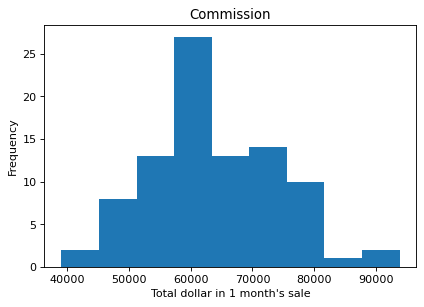

In [8]:
fig = plt.hist(sample1, bins = 'auto')
plt.title('Commission')
plt.ylabel('Frequency')
plt.xlabel("Total dollar in 1 month's sale")
plt.show()

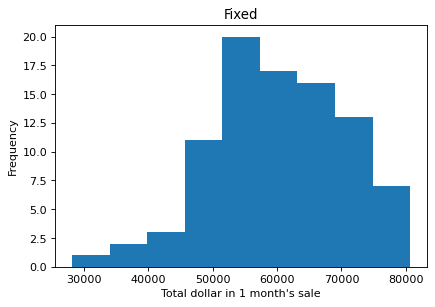

In [9]:
fig = plt.hist(sample2, bins = 'auto')
plt.title('Fixed')
plt.ylabel('Frequency')
plt.xlabel("Total dollar in 1 month's sale")
plt.show()

Based on the histograms, both samples appear to be normally distributed. 

t檢定前，先檢驗變異數是否相同  
令 $\sigma_1^2$ 為commission的變異數;  $\sigma_2^2$ 為fixed的變異數

Null Hypothesis: $\sigma_1^2 / \sigma_2^2 = 1$ <br>
Alternative Hypothesis: $\sigma_1^2 / \sigma_2^2 \ne 1$  

雙尾檢定，alpha = 0.05

In [10]:
var_ratio = stats.describe(sample1).variance / stats.describe(sample2).variance
print(f"var_ratio (F value) = {var_ratio:.4f}")

#stats.f.cdf計算 f 從 0~var_ratio 的機率，此題為雙尾檢定且Ｆvalue>1(右)，須調整為(1-pvalue)*2
ptmp = stats.f.cdf(var_ratio, v1, v2)
p_value = (1-ptmp)*2
print(f"p_value = {p_value:.4f}")

var_ratio (F value) = 1.0481
p_value = 0.8252


The p-value is larger than the required 0.05 significance level, there is no sufficient evidence to reject the null hypothesis of $\sigma_1^2 / \sigma_2^2 = 1$ <br>
As a result, we assume that the two populations have equal variance and apply equal-variance t-test on $\mu_1 - \mu_2 = 0$. 

In [11]:
# t-test using sms.CompareMeans
cm = sms.CompareMeans(sms.DescrStatsW(sample1), sms.DescrStatsW(sample2))
# usevarstr, ‘pooled’ or ‘unequal’
cm.summary(usevar='pooled', alpha = 0.05)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,3317.8111,1584.821,2.093,0.038,190.356,6445.266


Based on the above result, the two-sided p-value < 0.05. Thus the one-sided p-value should be less than 0.025. Thus we can reject the null hypothesis at a significance level of 0.05. 

Thus, there is enough evidence to conclude that commission salespeople outperform fixed-salary salespersons.

### 13.37 (25%)

令 $\mu_1$ 為after的平均分數;  $\mu_2$ 為before的平均分數

Null Hypothesis: $\mu_1 - \mu_2 <= 0$  
Alternative Hypothesis: $\mu_1 - \mu_2 > 0$

Alpha = 0.05

In [12]:
data37 = pd.read_excel("Xr13-37.xlsx")

# 轉換成numpy array
sample1 = data37['After'].values
sample2 = data37['Before'].values

sample1 = sample1[~np.isnan(sample1)]
sample2 = sample2[~np.isnan(sample2)]

#自由度計算
v1 = sample1.shape[0] - 1
v2 = sample2.shape[0] - 1

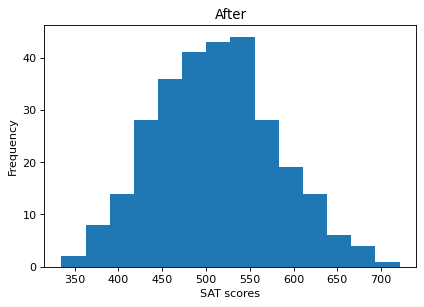

In [13]:
fig = plt.hist(sample1, bins = 'auto')
plt.title('After')
plt.ylabel('Frequency')
plt.xlabel('SAT scores')
plt.show()

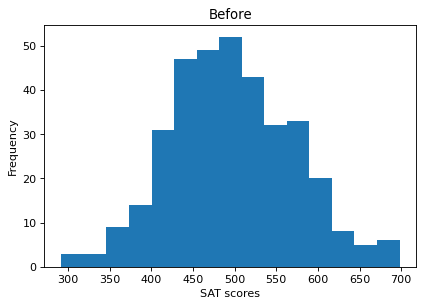

In [14]:
fig = plt.hist(sample2, bins = 'auto')
plt.title('Before')
plt.ylabel('Frequency')
plt.xlabel('SAT scores')
plt.show()

Based on the histograms, both samples appear to be normally distributed. 

t檢定前，先檢驗變異數是否相同  
令 $\sigma_1^2$ 為after的變異數;  $\sigma_2^2$ 為before的變異數

Null Hypothesis: $\sigma_1^2 / \sigma_2^2 = 1$ <br>
Alternative Hypothesis: $\sigma_1^2 / \sigma_2^2 \ne 1$  

雙尾檢定，alpha = 0.05

In [15]:
var_ratio = stats.describe(sample1).variance / stats.describe(sample2).variance
print(f"var_ratio (F value) = {var_ratio:.4f}")

#stats.f.cdf計算 f 從 0~var_ratio 的機率，此題為雙尾檢定且Ｆvalue<1(左)，須調整為pvalue*2
ptmp = stats.f.cdf(var_ratio, v1, v2)
p_value = ptmp*2
print(f"p_value = {p_value:.4f}")

var_ratio (F value) = 0.8763
p_value = 0.2429


The p-value is larger than the required 0.05 significance level, there is no sufficient evidence to reject the null hypothesis of $\sigma_1^2 / \sigma_2^2 = 1$ <br>
As a result, we assume that the two populations have equal variance and apply equal-variance t-test on $\mu_1 - \mu_2 = 0$. 

In [16]:
# t-test using sms.CompareMeans
cm = sms.CompareMeans(sms.DescrStatsW(sample1), sms.DescrStatsW(sample2))
# usevarstr, ‘pooled’ or ‘unequal’
cm.summary(usevar='pooled', alpha = 0.05)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,14.4212,5.686,2.536,0.011,3.255,25.588


Based on the above result, the two-sided p-value < 0.05. Thus the one-sided p-value should be less than 0.025. Thus we can reject the null hypothesis at a significance level of 0.05. 

Thus, there is enough evidence to conclude that SAT scores increased after the change in school start time.

### 13.115 (25%)

令 $\sigma_1^2$ 為method1的變異數;  $\sigma_2^2$ 為method2的變異數

Null Hypothesis: $\sigma_1^2 / \sigma_2^2 = 1$ <br>
Alternative Hypothesis: $\sigma_1^2 / \sigma_2^2 > 1$  

右尾檢定，Alpha = 0.05

In [17]:
data115 = pd.read_excel("Xr13-115.xlsx")

# 轉換成numpy array
sample1 = data115['Method 1'].values
sample2 = data115['Method 2'].values

# 移除nan
sample1 = sample1[~np.isnan(sample1)]
sample2 = sample2[~np.isnan(sample2)]

#自由度計算
v1 = sample1.shape[0] - 1
v2 = sample2.shape[0] - 1

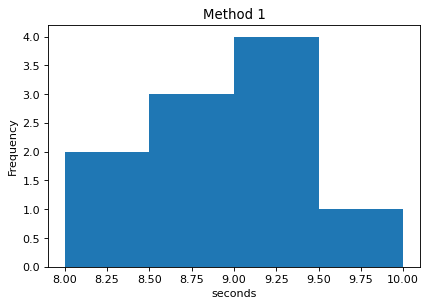

In [18]:
fig = plt.hist(sample1, bins = [8,8.5,9,9.5,10])
plt.title('Method 1')
plt.ylabel('Frequency')
plt.xlabel('seconds')
plt.show()

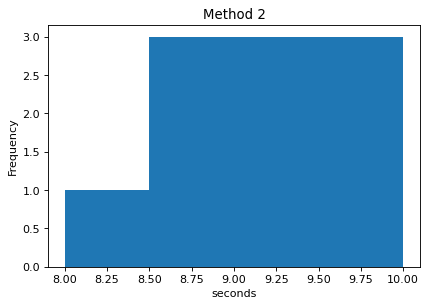

In [19]:
fig = plt.hist(sample2, bins = [8,8.5,9,9.5,10])
plt.title('Method 2')
plt.ylabel('Frequency')
plt.xlabel('seconds')
plt.show()

Based on the histograms, both samples appear to be normally distributed. 

In [20]:
var_ratio = stats.describe(sample1).variance / stats.describe(sample2).variance
print(f"var_ratio (F value) = {var_ratio:.4f}")

#stats.f.cdf計算 f 從 0~var_ratio 的機率，因此題為右尾檢定，須調整為1-pvalue
ptmp = stats.f.cdf(var_ratio, v1, v2)
p_value = 1 - ptmp
print(f"p_value = {p_value:.4f}")

var_ratio (F value) = 0.9795
p_value = 0.5121


The p-value is larger than the required 0.05 significance level, there is no sufficient evidence to reject the null hypothesis of $\sigma_1^2 / \sigma_2^2 = 1$ <br>
Thus, there is no sufficient evidence at the 5% significance level to conclude that the second method is more consistent than the first one.

### 13.116 (25%)

令 $\sigma_1^2$ 為class1的變異數;  $\sigma_2^2$ 為class2的變異數

Null Hypothesis: $\sigma_1^2 / \sigma_2^2 = 1$ <br>
Alternative Hypothesis: $\sigma_1^2 / \sigma_2^2 \ne 1$  

雙尾檢定，Alpha = 0.05

In [21]:
data116 = pd.read_excel("Xr13-116.xlsx")

# 轉換成numpy array
sample1 = data116['Class 1'].values
sample2 = data116['Class 2'].values

# 移除nan
sample1 = sample1[~np.isnan(sample1)]
sample2 = sample2[~np.isnan(sample2)]

#自由度計算
v1 = sample1.shape[0] - 1
v2 = sample2.shape[0] - 1

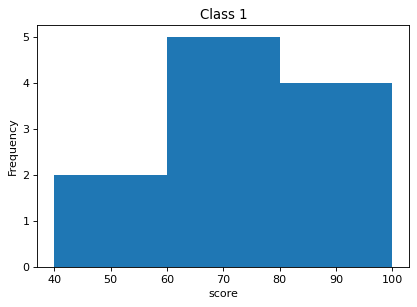

In [22]:
fig = plt.hist(sample1, bins = [40,60,80,100])
plt.title('Class 1')
plt.ylabel('Frequency')
plt.xlabel('score')
plt.show()

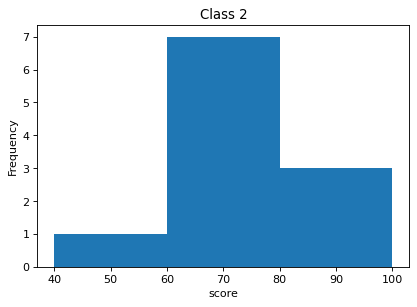

In [23]:
fig = plt.hist(sample2, bins = [40,60,80,100])
plt.title('Class 2')
plt.ylabel('Frequency')
plt.xlabel('score')
plt.show()

Based on the histograms, both samples appear to be normally distributed. 

In [24]:
var_ratio = stats.describe(sample1).variance / stats.describe(sample2).variance
print(f"var_ratio (F value) = {var_ratio:.4f}")

#stats.f.cdf計算 f 從 0~var_ratio 的機率，此題為雙尾檢定且Ｆvalue>1(右)，須調整為(1-pvalue)*2
ptmp = stats.f.cdf(var_ratio, v1, v2)
p_value = (1-ptmp)*2
print(f"p_value = {p_value:.4f}")

var_ratio (F value) = 3.2279
p_value = 0.0783


The p-value is larger than the required 0.05 significance level, there is no sufficient evidence to reject the null hypothesis of $\sigma_1^2 / \sigma_2^2 = 1$ <br>
Thus, there is no sufficient evidence at the 5% significance level to conclude that the variences of the marks differ between the two sections.

### 13.117 (25%)

令 $\sigma_1^2$ 為Week1的變異數;  $\sigma_2^2$ 為Week2的變異數

Null Hypothesis: $\sigma_1^2 / \sigma_2^2 = 1$ <br>
Alternative Hypothesis: $\sigma_1^2 / \sigma_2^2 > 1$  

右尾檢定，Alpha = 0.05

In [25]:
data117 = pd.read_excel("Xr13-117.xlsx")

# 轉換成numpy array
sample1 = data117['Week 1'].values
sample2 = data117['Week 2'].values

# 移除nan
sample1 = sample1[~np.isnan(sample1)]
sample2 = sample2[~np.isnan(sample2)]

#自由度計算
v1 = sample1.shape[0] - 1
v2 = sample2.shape[0] - 1

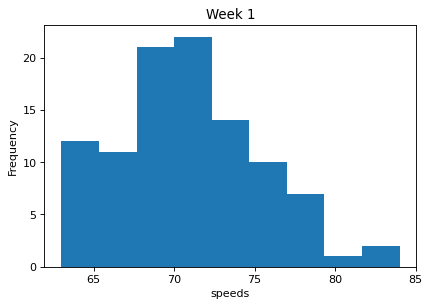

In [26]:
fig = plt.hist(sample1, bins = 'auto')
plt.title('Week 1')
plt.ylabel('Frequency')
plt.xlabel('speeds')
plt.show()

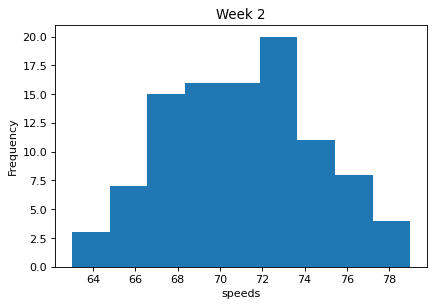

In [27]:
fig = plt.hist(sample2, bins = 'auto')
plt.title('Week 2')
plt.ylabel('Frequency')
plt.xlabel('speeds')
plt.show()

Based on the histograms, both samples appear to be normally distributed. 

In [28]:
var_ratio = stats.describe(sample1).variance / stats.describe(sample2).variance
print(f"var_ratio (F value) = {var_ratio:.4f}")

#stats.f.cdf計算 f 從 0~var_ratio 的機率，因此題為右尾檢定，須調整為1-pvalue
ptmp = stats.f.cdf(var_ratio, v1, v2)
p_value = 1 - ptmp
print(f"p_value = {p_value:.4f}")

var_ratio (F value) = 1.5261
p_value = 0.0183


The p-value is less than the required 0.05 significance level, there is sufficient evidence to reject the null hypothesis of $\sigma_1^2 / \sigma_2^2 = 1$ <br>
Thus, there is sufficient evidence at the 5% significance level to conclude that limiting the minimum and maximum speeds reduces the variation on speeds.